In [ ]:
# Create a custom mapping between SHAP model names and Ekaterina's feature names
model_mapping = {
    'camem_bert_base_embeddings': 'cam_base',
    'distilled_bert_base_cased': 'distilbert_base',
    'flaubert_base_cased': 'flau_base_c',
    'flaubert_base_uncased': 'flau_base_u',
    'flaubert_large_uncased': 'flau_large_c',
    'flaubert_small_cased': 'flau_small_c',
    'mbert_base_cased': 'bert_base_c',
    'mbert_base_uncased': 'bert_base_u',
    'xlmr_r_large': 'xlm_large',
    'xlm_roberta_base': 'xlm_base'
}

top_feature_percentages = [1, 5, 10, 25, 50, 75]
# Dictionary to store common features per model and percentage
common_features_per_model = {}

# Loop through each SHAP model and map it to the corresponding Ekaterina model
for lime_model in lime_models:
    # Check if the shap model is in the model mapping
    if lime_model not in model_mapping:
        print(f"⚠️ Model '{lime_model}' not found in model mapping. Skipping...")
        continue

    # Get the corresponding Ekaterina model name
    ekaterina_model = model_mapping[lime_model]

    common_features_per_model[lime_model] = {}

    print(f"\n🔹 **Model: {lime_model}**)")

    # Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        if lime_model not in top_lime_features or percent not in top_lime_features[lime_model]:
            continue

        # Extract SHAP-selected features for the current model and percentage
        shap_features = top_lime_features[lime_model][percent]

        # Check if the model exists in Ekaterina's DataFrame and if PercX column is available
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            # Check if the PercX column exists for the model
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                # Extract the corresponding PercX features from Ekaterina's file
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find common features between SHAP's top features and Ekaterina's PercX features
                common_features = shap_features.intersection(ekaterina_features)

                # Store the common features in the dictionary
                common_features_per_model[lime_model][percent] = common_features

                # Print results in the new requested format
                print(f"   ✅ Top {percent}% - Common Features ({len(common_features)}) : {list(common_features)}")
            else:
                print(f"   ⚠️ Perc{percent} column not found for model {ekaterina_model}. Skipping...")
        else:
            print(f"   ⚠️ Model '{ekaterina_model}' not found in Ekaterina's dataset. Skipping...")

    print("-" * 70)  # Separator for better readability



🔹 **Model: camem_bert_base_embeddings**)
   ✅ Top 1% - Common Features (0) : []
   ✅ Top 5% - Common Features (1) : ['1']
   ✅ Top 10% - Common Features (2) : ['1', '8']
   ✅ Top 25% - Common Features (2) : ['1', '8']
   ✅ Top 50% - Common Features (8) : ['2', '1', '9', '8', '5', '6', '3', '0']
   ✅ Top 75% - Common Features (10) : ['2', '1', '7', '9', '4', '8', '5', '6', '3', '0']
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased**)
   ✅ Top 1% - Common Features (1) : ['2']
   ✅ Top 5% - Common Features (1) : ['2']
   ✅ Top 10% - Common Features (1) : ['2']
   ✅ Top 25% - Common Features (4) : ['2', '1', '7', '8']
   ✅ Top 50% - Common Features (8) : ['2', '1', '7', '9', '4', '8', '5', '3']
   ✅ Top 75% - Common Features (10) : ['2', '1', '7', '9', '4', '8', '5', '6', '3', '0']
----------------------------------------------------------------------

🔹 **Model: flaubert_base_cased**)
   ✅ Top 1% - Common Features (0) : []
   ✅ 

# Identify unique dimensions in LIME that are not in Ekaterina’s set.


In [ ]:
# Dictionary to store unique SHAP features per model and percentage
unique_lime_features_per_model = {}

# Loop through each SHAP model
for lime_model in lime_models:
    # Check if the SHAP model has a corresponding feature in Ekaterina's dataset
    if lime_model not in model_mapping:
        print(f"⚠️ Model '{lime_model}' not found in model mapping. Skipping...")
        continue

    # Get the corresponding Ekaterina model name
    ekaterina_model = model_mapping[lime_model]

    unique_lime_features_per_model[lime_model] = {}

    print(f"\n🔹 **Model: {lime_model}** (Mapped to Ekaterina: {ekaterina_model})")

    # Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        if lime_model not in top_lime_features or percent not in top_lime_features[lime_model]:
            continue

        # Extract SHAP-selected features for the current model and percentage
        lime_features = top_lime_features[lime_model][percent]

        # Check if the model exists in Ekaterina's DataFrame and if PercX column is available
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            # Check if the PercX column exists for the model
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                # Extract the corresponding PercX features from Ekaterina's file
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find SHAP features that are NOT in Ekaterina’s set (unique SHAP features)
                unique_lime_features = lime_features - ekaterina_features

                # Store the unique features in the dictionary
                unique_lime_features_per_model[lime_model][percent] = unique_lime_features

                # Print results in the requested format
                print(f"   ✅ Top {percent}% - Unique LIME Features ({len(unique_lime_features)}) : {list(unique_lime_features)[:10]}")
            else:
                print(f"   ⚠️ Perc{percent} column not found for model {ekaterina_model}. Skipping...")
        else:
            print(f"   ⚠️ Model '{ekaterina_model}' not found in Ekaterina's dataset. Skipping...")

    print("-" * 70)  # Separator for better readability



🔹 **Model: camem_bert_base_embeddings** (Mapped to Ekaterina: cam_base)
   ✅ Top 1% - Unique LIME Features (10) : ['144', '309', '600', '713', '274', '23', '465', '714', '434', '692']
   ✅ Top 5% - Unique LIME Features (50) : ['144', '309', '600', '234', '243', '189', '667', '459', '100', '113']
   ✅ Top 10% - Unique LIME Features (100) : ['144', '644', '549', '600', '280', '296', '269', '667', '100', '526']
   ✅ Top 25% - Unique LIME Features (254) : ['144', '549', '280', '269', '526', '714', '101', '39', '450', '429']
   ✅ Top 50% - Unique LIME Features (504) : ['144', '617', '549', '280', '269', '394', '526', '714', '101', '39']
   ✅ Top 75% - Unique LIME Features (758) : ['144', '617', '549', '543', '280', '67', '44', '269', '486', '401']
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased** (Mapped to Ekaterina: distilbert_base)
   ✅ Top 1% - Unique LIME Features (9) : ['715', '646', '331', '282', '474', '643', '762', '78',

# Identify unique dimensions in SHAP that are not in Ekaterina’s set

In [ ]:
import ast
# Function to convert string representation of a list into an actual list
def convert_string_to_list(column):
    cleaned_data = []
    for row in column:
        # Convert the string representation of the list to an actual list of integers
        row_list = ast.literal_eval(row)
        cleaned_data.append(row_list)
    return cleaned_data

# Apply the conversion function to each PercX column
for col in ['Perc1', 'Perc5', 'Perc10']:
    ekaterina[col] = convert_string_to_list(ekaterina[col])

# Print the cleaned DataFrame
print(ekaterina[['Feature', 'Perc1', 'Perc5', 'Perc10']])

           Feature                                              Perc1  \
0     flau_small_c                [162, 100, 434, 245, 377, 507, 316]   
1      flau_base_u  [130, 546, 456, 138, 671, 433, 17, 307, 81, 21...   
2      flau_base_c  [130, 611, 70, 71, 359, 425, 587, 749, 526, 75...   
3     flau_large_c  [136, 552, 972, 15, 760, 862, 274, 182, 342, 1...   
4         cam_base  [384, 129, 7, 648, 401, 147, 35, 685, 173, 558...   
5        xlm_large  [136, 908, 526, 24, 153, 934, 939, 940, 173, 4...   
6         xlm_base  [257, 517, 135, 12, 268, 397, 527, 272, 39, 43...   
7      bert_base_u  [515, 643, 517, 10, 11, 270, 15, 145, 665, 412...   
8  distilbert_base  [320, 1, 673, 353, 196, 677, 37, 488, 713, 76,...   
9      bert_base_c  [704, 610, 195, 548, 742, 135, 270, 208, 721, ...   

                                               Perc5  \
0  [387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...   
1  [1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...   
2  [513, 130, 517, 261, 136,

In [ ]:
# Dictionary to store unique Ekaterina features per model and percentage
unique_ekaterina_features_per_model = {}

# Loop through each SHAP model
for lime_model in lime_models:
    # Check if the SHAP model has a corresponding feature in Ekaterina's dataset
    if lime_model not in model_mapping:
        print(f"⚠️ Model '{lime_model}' not found in model mapping. Skipping...")
        continue

    # Get the corresponding Ekaterina model name
    ekaterina_model = model_mapping[lime_model]

    unique_ekaterina_features_per_model[lime_model] = {}

    print(f"\n🔹 **Model: {lime_model}** ")

    # Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        if lime_model not in top_lime_features or percent not in top_lime_features[lime_model]:
            continue

        # Extract SHAP-selected features for the current model and percentage
        shap_features = top_lime_features[lime_model][percent]

        # Check if the model exists in Ekaterina's DataFrame and if PercX column is available
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            # Check if the PercX column exists for the model
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                # Extract the corresponding PercX features from Ekaterina's file
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find Ekaterina features that are NOT in SHAP (unique Ekaterina features)
                unique_ekaterina_features = ekaterina_features - shap_features

                # Store the unique features in the dictionary
                unique_ekaterina_features_per_model[lime_model][percent] = unique_ekaterina_features

                # Print results in the requested format
                print(f"   ✅ Top {percent}% - Unique Ekaterina Features ({len(unique_ekaterina_features)}) : {list(unique_ekaterina_features)[:10]}")
            else:
                print(f"   ⚠️ Perc{percent} column not found for model {ekaterina_model}. Skipping...")
        else:
            print(f"   ⚠️ Model '{ekaterina_model}' not found in Ekaterina's dataset. Skipping...")

    print("-" * 70)  # Separator for better readability



🔹 **Model: camem_bert_base_embeddings** 
   ✅ Top 1% - Unique Ekaterina Features (22) : [384, 129, 7, 648, 401, 147, 35, 685, 173, 558]
   ✅ Top 5% - Unique Ekaterina Features (113) : [512, 2, 6, 7, 523, 16, 18, 530, 531, 21]
   ✅ Top 10% - Unique Ekaterina Features (204) : [512, 2, 6, 7, 523, 525, 526, 15, 16, 529]
   ✅ Top 25% - Unique Ekaterina Features (12) : [',', '7', '2', '9', '[', '4', '5', '6', ' ', '3']
   ✅ Top 50% - Unique Ekaterina Features (6) : [',', '7', '4', ' ', '[', ']']
   ✅ Top 75% - Unique Ekaterina Features (4) : [',', '[', ']', ' ']
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased** 
   ✅ Top 1% - Unique Ekaterina Features (18) : [320, 1, 673, 353, 196, 677, 37, 488, 713, 76]
   ✅ Top 5% - Unique Ekaterina Features (101) : [512, 1, 515, 4, 517, 7, 9, 13, 531, 25]
   ✅ Top 10% - Unique Ekaterina Features (190) : [512, 1, 515, 4, 517, 7, 9, 10, 13, 526]
   ✅ Top 25% - Unique Ekaterina Features (10) : [',

# Computes Percentage Overlap.


In [ ]:
# Dictionary to store percentage overlap per model and percentage
overlap_percentage_per_model = {}

# Loop through each SHAP model
for lime_model in lime_models:
    if lime_model not in model_mapping:
        print(f"⚠️ Model '{lime_model}' not found in model mapping. Skipping...")
        continue

    ekaterina_model = model_mapping[lime_model]
    overlap_percentage_per_model[lime_model] = {}

    print(f"\n🔹 **Model: {lime_model}**")

    for percent in top_feature_percentages:
        if lime_model not in top_lime_features or percent not in top_lime_features[lime_model]:
            continue

        lime_features = set(top_lime_features[lime_model][percent])

        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'

            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            if perc_column in model_row.columns:
                ekaterina_features = set(model_row[perc_column].values[0])

                # Find common features
                common_features = shap_features.intersection(ekaterina_features)

                # Calculate overlap percentage
                total_features = len(shap_features)
                overlap_percentage = (len(common_features) / total_features) * 100 if total_features > 0 else 0

                overlap_percentage_per_model[lime_model][percent] = overlap_percentage

                print(f"   ✅ Top {percent}% - Overlap Percentage: {overlap_percentage:.2f}% ({len(common_features)} / {total_features})")

    print("-" * 70)



🔹 **Model: camem_bert_base_embeddings**
   ✅ Top 1% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 5% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 10% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 25% - Overlap Percentage: 1.30% (10 / 768)
   ✅ Top 50% - Overlap Percentage: 1.30% (10 / 768)
   ✅ Top 75% - Overlap Percentage: 1.30% (10 / 768)
----------------------------------------------------------------------

🔹 **Model: distilled_bert_base_cased**
   ✅ Top 1% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 5% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 10% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 25% - Overlap Percentage: 1.30% (10 / 768)
   ✅ Top 50% - Overlap Percentage: 1.30% (10 / 768)
   ✅ Top 75% - Overlap Percentage: 1.30% (10 / 768)
----------------------------------------------------------------------

🔹 **Model: flaubert_base_cased**
   ✅ Top 1% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 5% - Overlap Percentage: 0.00% (0 / 768)
   ✅ Top 10% - Overlap Percen

In [ ]:
import pandas as pd

# Prepare data for saving
overlap_results = []

for model, percent_data in overlap_percentage_per_model.items():
    for percent, overlap_percentage in percent_data.items():
        # Get total SHAP features for the model at the given percentage
        total_lime_features = len(top_lime_features[model][percent])

        # Get total Ekaterina features for the model (from PercX columns)
        ekaterina_model = model_mapping.get(model, None)
        if ekaterina_model in ekaterina['Feature'].values:
            perc_column = f'Perc{percent}'
            model_row = ekaterina[ekaterina['Feature'] == ekaterina_model]
            ekaterina_features = set(model_row[perc_column].values[0])  # Convert to set for easy intersection
            total_ekaterina_features = len(ekaterina_features)

            # Find common features between SHAP and Ekaterina
            common_features = top_lime_features[model][percent].intersection(ekaterina_features)
            common_features_count = len(common_features)
        else:
            total_ekaterina_features = 0
            common_features = []
            common_features_count = 0

        # Append the results to the list
        overlap_results.append({
            "Model": model,
            "Top Percentage": f"Top {percent}%",
            "Common Features Count": common_features_count,
            "Common Features": ", ".join(map(str, common_features)),  # Convert list of common features to a string
            "Total LIME Features": total_lime_features,
            "Ekaterina Total Dimensions": total_ekaterina_features,
            "Overlap Percentage": f"{overlap_percentage:.2f}%",
        })

# Convert to DataFrame
overlap_df = pd.DataFrame(overlap_results)

# Save to CSV
csv_filename = "LIME_ekaterina_overlap_results.csv"
overlap_df.to_csv(csv_filename, index=False)

print(f"\n✅ Overlap results saved successfully to '{csv_filename}'")



✅ Overlap results saved successfully to 'LIME_ekaterina_overlap_results.csv'


In [ ]:
overlap_df

,Model,Top Percentage,Common Features Count,Common Features,Total LIME Features,Ekaterina Total Dimensions,Overlap Percentage
0,camem_bert_base_embeddings,Top 1%,0,,10,22,0.00%
1,camem_bert_base_embeddings,Top 5%,0,,51,113,0.00%
2,camem_bert_base_embeddings,Top 10%,0,,102,204,0.00%
3,camem_bert_base_embeddings,Top 25%,2,"1, 8",256,14,1.30%
4,camem_bert_base_embeddings,Top 50%,8,"2, 1, 9, 8, 5, 6, 3, 0",512,14,1.30%
5,camem_bert_base_embeddings,Top 75%,10,"2, 1, 7, 9, 4, 8, 5, 6, 3, 0",768,14,1.30%
6,distilled_bert_base_cased,Top 1%,0,,10,18,0.00%
7,distilled_bert_base_cased,Top 5%,0,,51,101,0.00%
8,distilled_bert_base_cased,Top 10%,0,,102,190,0.00%
9,distilled_bert_base_cased,Top 25%,4,"2, 1, 7, 8",256,14,1.30%


In [ ]:
overlap_df = overlap_df[overlap_df['Common Features'].astype(str) != '']
overlap_df

,Model,Top Percentage,Common Features Count,Common Features,Total LIME Features,Ekaterina Total Dimensions,Overlap Percentage
3,camem_bert_base_embeddings,Top 25%,2,"1, 8",256,14,1.30%
4,camem_bert_base_embeddings,Top 50%,8,"2, 1, 9, 8, 5, 6, 3, 0",512,14,1.30%
5,camem_bert_base_embeddings,Top 75%,10,"2, 1, 7, 9, 4, 8, 5, 6, 3, 0",768,14,1.30%
9,distilled_bert_base_cased,Top 25%,4,"2, 1, 7, 8",256,14,1.30%
10,distilled_bert_base_cased,Top 50%,8,"2, 1, 7, 9, 4, 8, 5, 3",512,14,1.30%
11,distilled_bert_base_cased,Top 75%,10,"2, 1, 7, 9, 4, 8, 5, 6, 3, 0",768,14,1.30%
15,flaubert_base_cased,Top 25%,3,"2, 7, 9",256,14,1.30%
16,flaubert_base_cased,Top 50%,7,"2, 1, 7, 9, 4, 5, 3",512,14,1.30%
17,flaubert_base_cased,Top 75%,10,"2, 1, 7, 9, 4, 8, 5, 6, 3, 0",768,14,1.30%
21,flaubert_base_uncased,Top 25%,4,"6, 2, 4, 0",256,14,1.30%


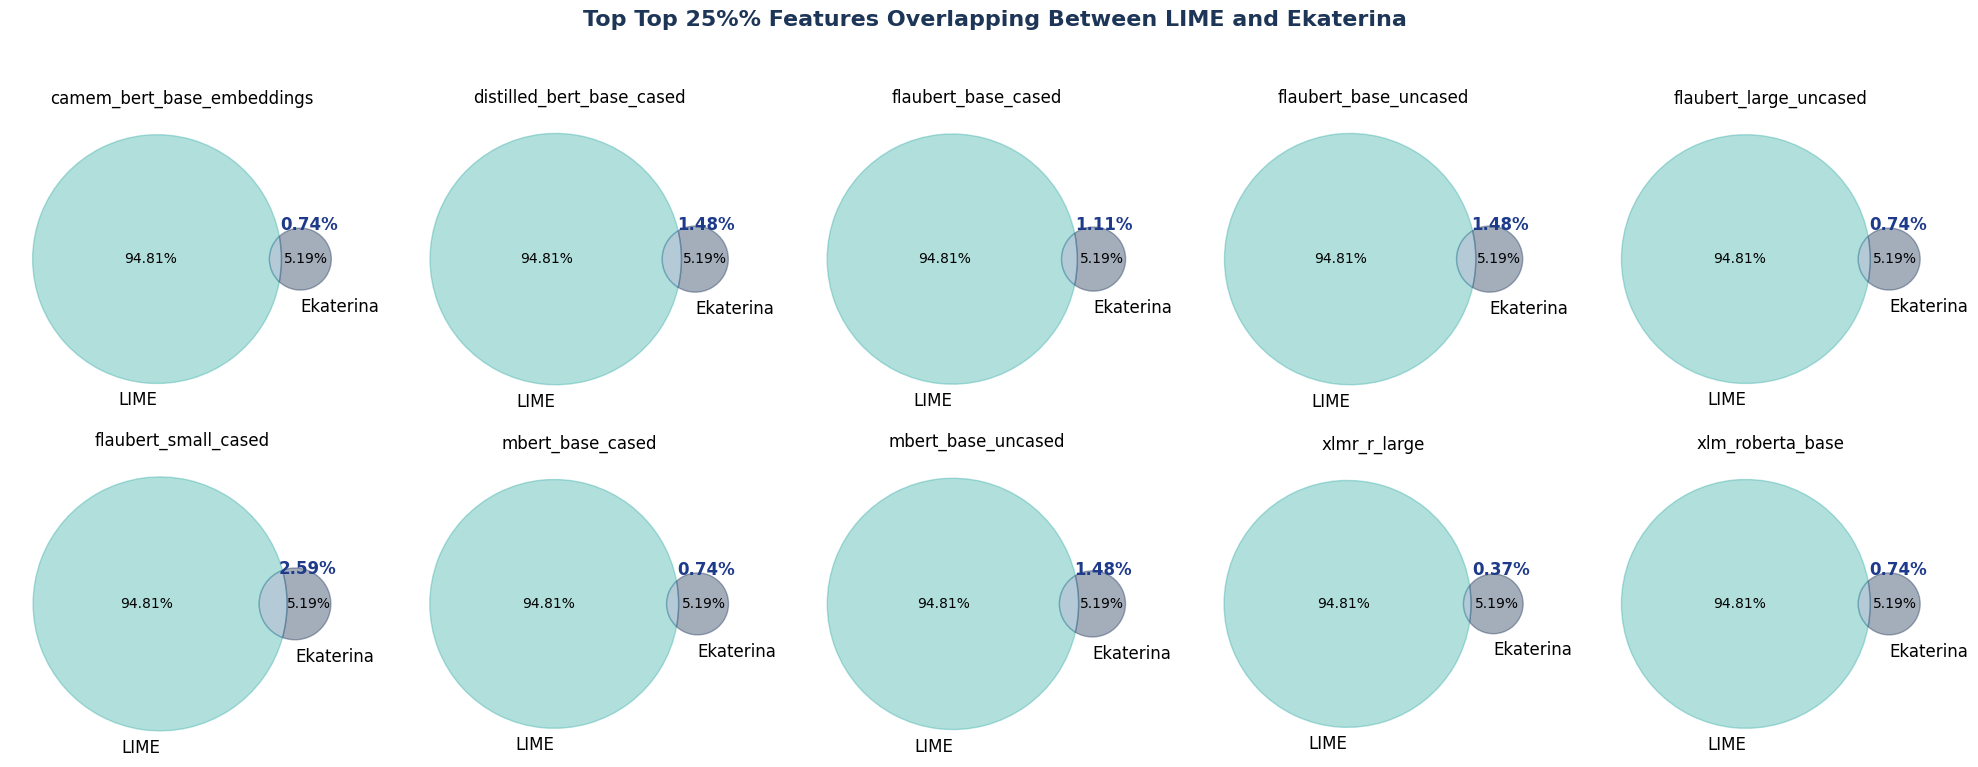

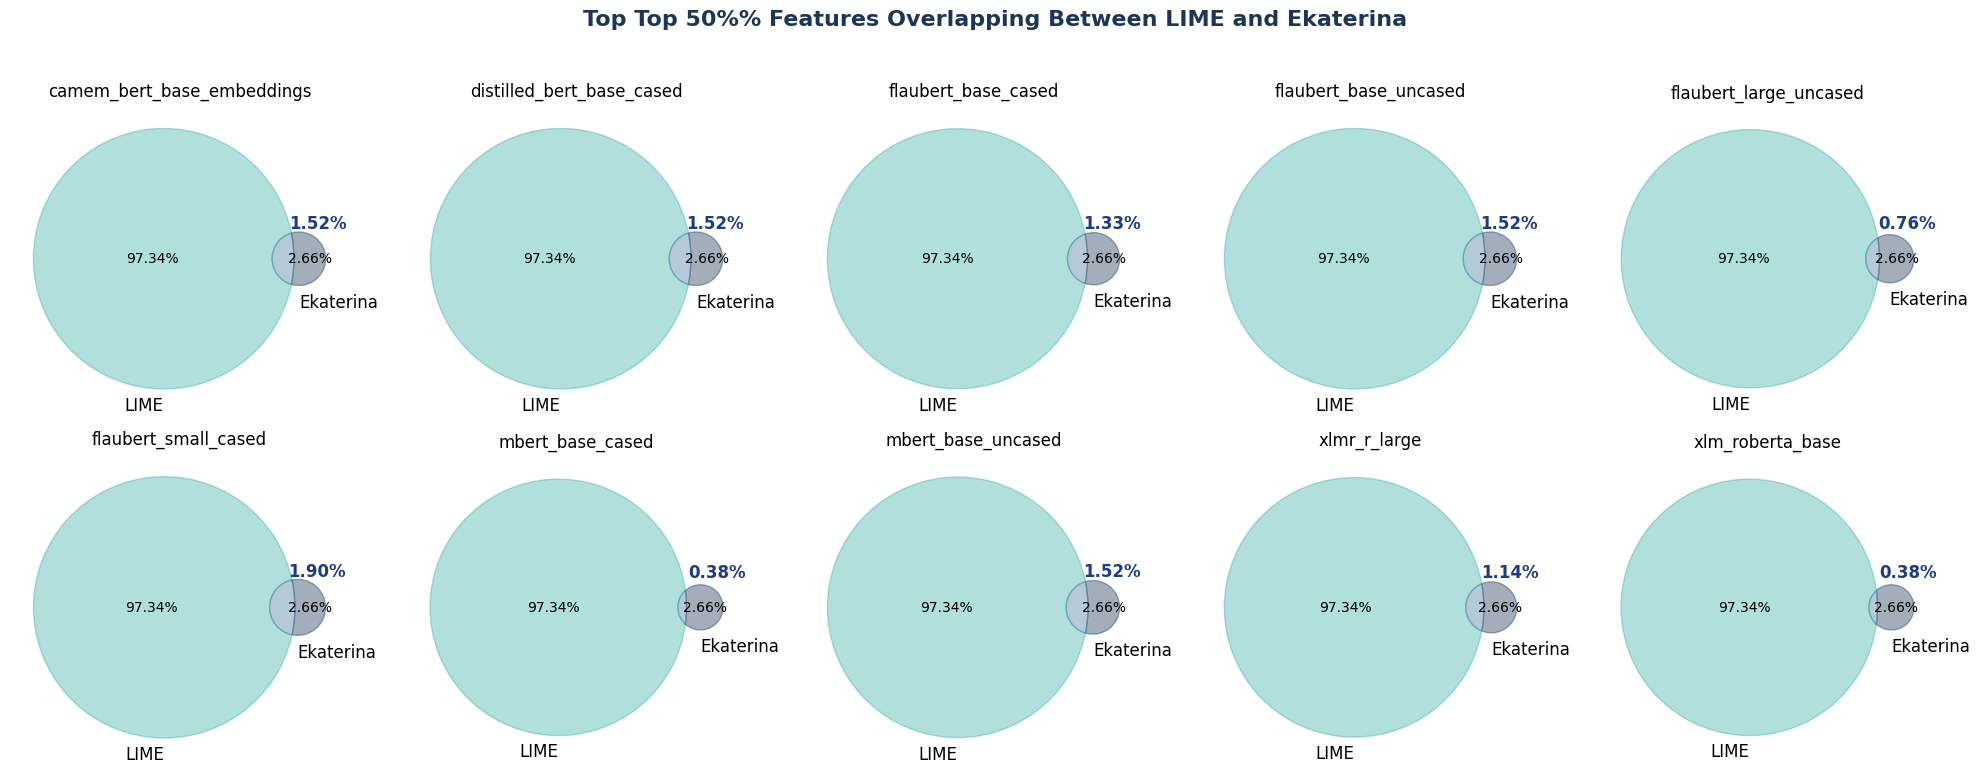

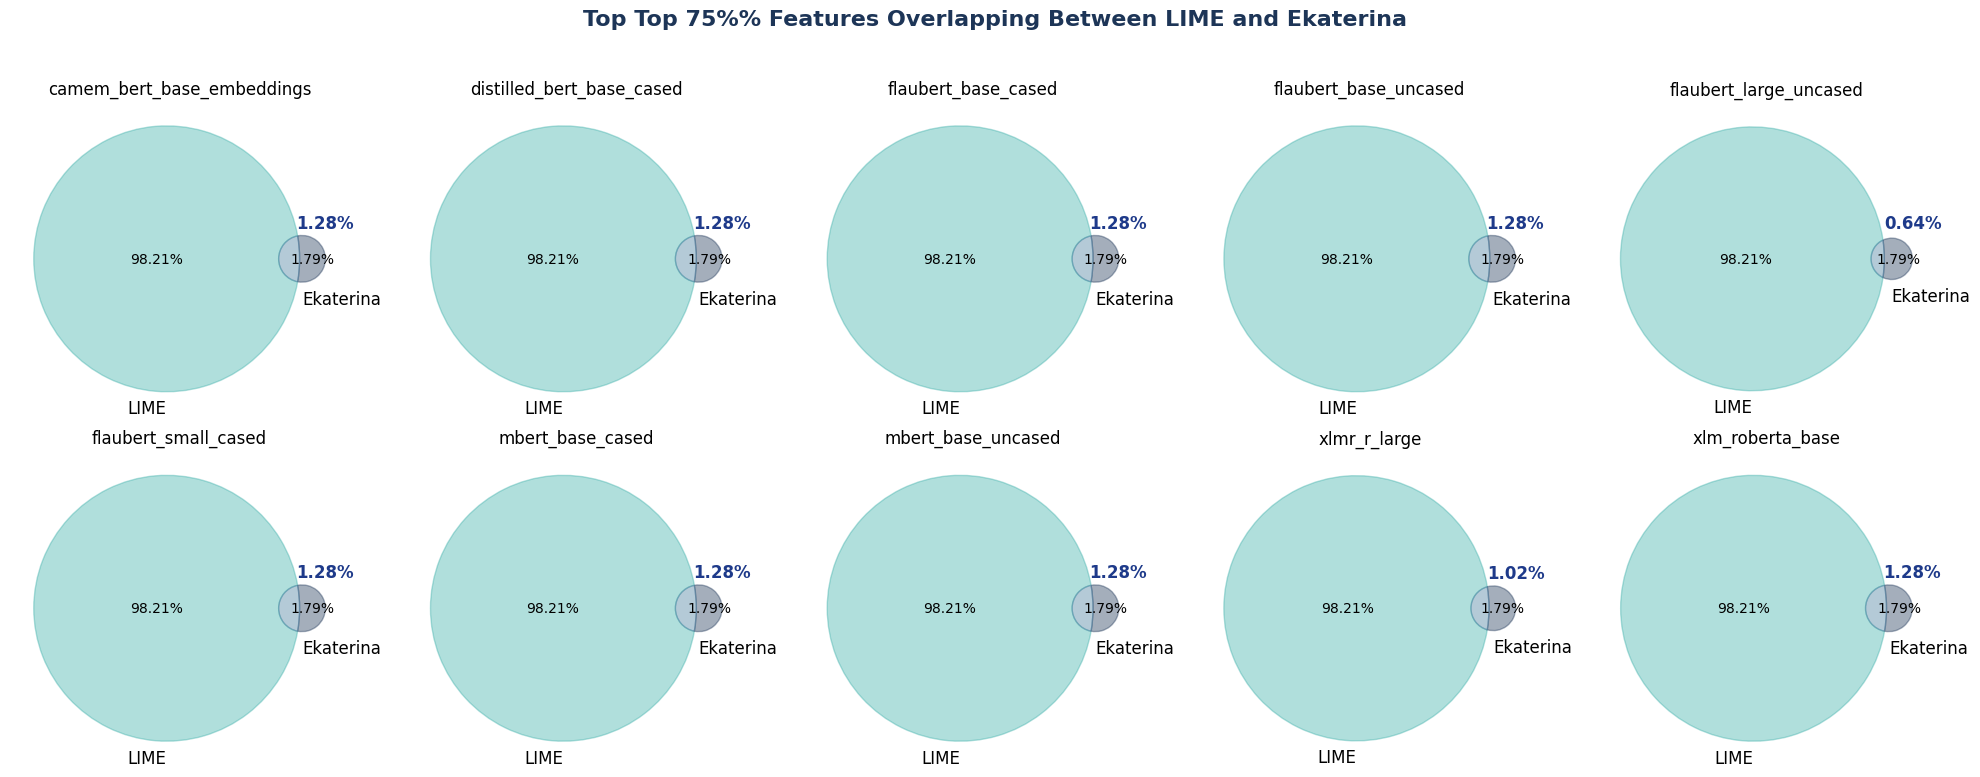

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import math

# Filter the overlap_df to remove rows with empty 'Common Features'
overlap_df = overlap_df[overlap_df['Common Features'].astype(str) != '']

# Get unique percentage levels from the 'Top Percentage' column
percentage_levels = sorted(overlap_df["Top Percentage"].unique())

# Define grid size (5 models per row)
cols = 5

# Iterate through each percentage level
for percent in percentage_levels:
    # Filter DataFrame for the current percentage
    df_filtered = overlap_df[overlap_df["Top Percentage"] == percent]

    # Define the number of rows based on the number of models in this percentage
    num_models = len(df_filtered)
    rows = math.ceil(num_models / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
    axes = axes.flatten()

    # Generate Venn diagrams for each model
    for idx, (index, row) in enumerate(df_filtered.iterrows()):
        ax = axes[idx]

        # Get values from DataFrame
        lime_features = row["Total LIME Features"]
        ekaterina_features = row["Ekaterina Total Dimensions"]
        common_features = row["Common Features Count"]

        # Calculate percentages for SHAP only, Ekaterina only, and Common features
        lime_percentage = (lime_features / (lime_features + ekaterina_features)) * 100 if (lime_features + ekaterina_features) > 0 else 0
        ekaterina_percentage = (ekaterina_features / (lime_features + ekaterina_features)) * 100 if (lime_features + ekaterina_features) > 0 else 0
        common_percentage = (common_features / (lime_features + ekaterina_features)) * 100 if (lime_features + ekaterina_features) > 0 else 0

        # Create Venn diagram
        venn = venn2(
            subsets=(lime_percentage, ekaterina_percentage, common_percentage),
            set_labels=("LIME", "Ekaterina"),
            ax=ax
        )

        # Set custom darker colors
        if venn.get_patch_by_id('10'):
            venn.get_patch_by_id('10').set_color("#3aafa9")  # SHAP only (Darker)
        if venn.get_patch_by_id('01'):
            venn.get_patch_by_id('01').set_color("#1d3557")  # Ekaterina only (Darker)
        if venn.get_patch_by_id('11'):
            venn.get_patch_by_id('11').set_color("#457b9d")  # Intersection (Darker)

        # Format the percentage text in the Venn diagram labels
        venn.get_label_by_id('10').set_text(f'{lime_percentage:.2f}%')
        venn.get_label_by_id('01').set_text(f'{ekaterina_percentage:.2f}%')

        # Manually position the intersection label outside the intersection circle
        intersection_label = venn.get_label_by_id('11')
        if intersection_label:
            intersection_label.set_text(f'{common_percentage:.2f}%')
            # Apply bold and blue style for the intersection label
            intersection_label.set_fontsize(12)
            intersection_label.set_fontweight('bold')
            intersection_label.set_color('#1e3a8a')  # Blue color

            # Get the position of the intersection label
            x, y = intersection_label.get_position()
            # Offset the label position outside the intersection area
            intersection_label.set_position((x + 0.15, y + 0.15))  # Adjust these values for better placement

        ax.set_title(f"{row['Model']}")

    # Hide empty subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    # Formatting
    plt.suptitle(f"Top {percent}% Features Overlapping Between LIME and Ekaterina", fontsize=16, fontweight="bold", color="#1d3557")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


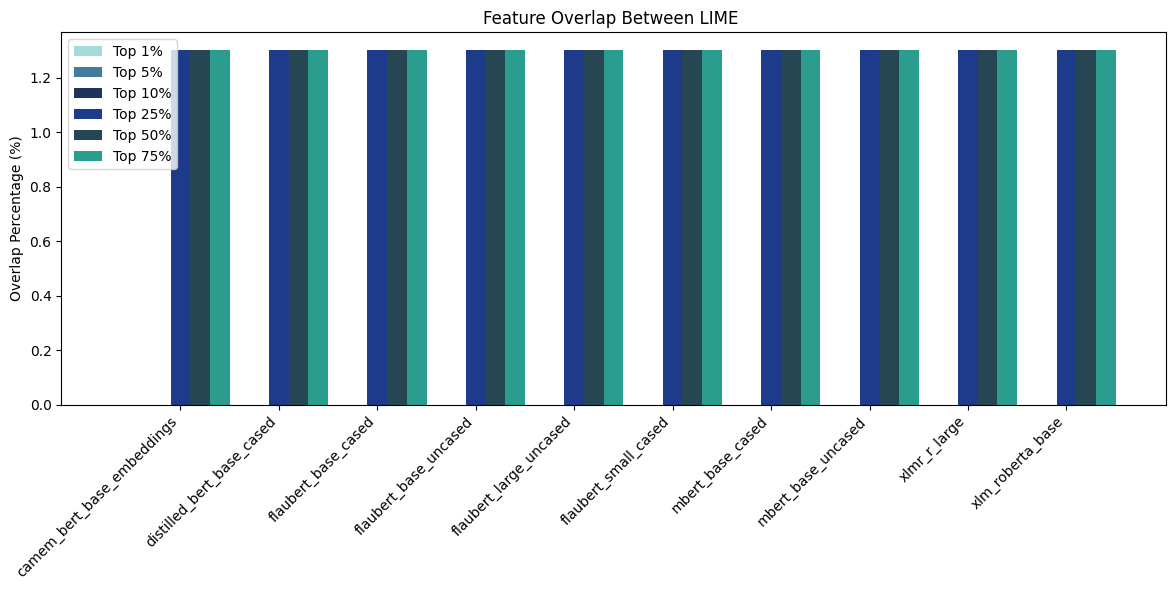

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract models from the overlap_percentage_per_model dictionary
models = list(overlap_percentage_per_model.keys())

# Extract overlap percentages for top 1%, 5%, 10%, 25%, 50%, 75% (or any custom percentage levels)
top_percentages = [1, 5, 10, 25, 50, 75]

# Extract overlap percentages for each model and top percentage
top_percent_values = {
    percent: [overlap_percentage_per_model[model].get(percent, 0) for model in models]
    for percent in top_percentages
}

# Define bar width and x locations
bar_width = 0.2
x = np.arange(len(models))

# Plot bars
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each percentage level
colors = ["#a8dadc", "#457b9d", "#1d3557", "#1e3a8a", "#264653", "#2a9d8f"]
labels = ["Top 1%", "Top 5%", "Top 10%", "Top 25%", "Top 50%", "Top 75%"]

for i, percent in enumerate(top_percentages):
    ax.bar(x + (i - len(top_percentages) // 2) * bar_width,
           top_percent_values[percent],
           bar_width,
           label=labels[i],
           color=colors[i])

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.set_ylabel("Overlap Percentage (%)")
ax.set_title("Feature Overlap Between LIME ")
ax.legend()

plt.tight_layout()
plt.show()
